<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#overview" data-toc-modified-id="overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>overview</a></span></li><li><span><a href="#data-preparation" data-toc-modified-id="data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data preparation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#결측치" data-toc-modified-id="결측치-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>결측치</a></span></li><li><span><a href="#Grant.status-비율" data-toc-modified-id="Grant.status-비율-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Grant.status 비율</a></span></li><li><span><a href="#personal-data" data-toc-modified-id="personal-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>personal data</a></span><ul class="toc-item"><li><span><a href="#person-column-확인" data-toc-modified-id="person-column-확인-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>person column 확인</a></span></li><li><span><a href="#팀당-인원수-:-n_people" data-toc-modified-id="팀당-인원수-:-n_people-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>팀당 인원수 : n_people</a></span></li><li><span><a href="#팀당-박사수-:-n_phd" data-toc-modified-id="팀당-박사수-:-n_phd-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>팀당 박사수 : n_phd</a></span></li><li><span><a href="#팀당-호주-출신-수--:-n_hl_eng" data-toc-modified-id="팀당-호주-출신-수--:-n_hl_eng-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>팀당 호주 출신 수  : n_hl_eng</a></span></li><li><span><a href="#팀당-지원금-수여-횟수,-실패-횟수,-총-지원-횟수,-성공-확률" data-toc-modified-id="팀당-지원금-수여-횟수,-실패-횟수,-총-지원-횟수,-성공-확률-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>팀당 지원금 수여 횟수, 실패 횟수, 총 지원 횟수, 성공 확률</a></span></li><li><span><a href="#팀당-경력-총합-:-sum_years" data-toc-modified-id="팀당-경력-총합-:-sum_years-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>팀당 경력 총합 : sum_years</a></span></li></ul></li><li><span><a href="#team-data" data-toc-modified-id="team-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>team data</a></span></li><li><span><a href="#RFCD" data-toc-modified-id="RFCD-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>RFCD</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#data-prepareation" data-toc-modified-id="data-prepareation-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>data prepareation</a></span></li></ul></li><li><span><a href="#Logistice-Regression" data-toc-modified-id="Logistice-Regression-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Logistice Regression</a></span></li></ul></li></ul></div>

In [75]:
# 개인별 정보를 팀별 정보로 요약하는 방법

In [275]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sb

import datetime

# label encoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report as clr
# logistic regression
from sklearn.linear_model import LogisticRegression

## overview

**prediction**  
*Grant.Status*  

Predictions should take the same format as unimelb_example.csv  
a CSV file with 2,176 rows, a grant application ID in the first column and a probability of success - between 0 and 1 - in the second column 

**description**

* Team Data
    * Sponsor Code: an ID used to represent different sponsors
    * Grant Category Code: categorization of the sponsor (e.g. Australian competitive grants, cooperative research centre, industry)
    * Contract Value Band: the grant's value (see key below)
    * Start Date: the date the grant application was submitted
    * RFCD Code: research fields, courses and disciplines classification (see definitions)
    * RFCD Percentage: if there are several RFCD codes that are relevant to a project
    * SEO Code: socio economic objective classification (see definitions)
    * SEO Percentage: if there are several SEO codes that are relevant to a project


* Personal data
    * Person ID: the investigator's unique ID
    * Role: the investigator's role in the study
    * Year of Birth: the investigator's year of birth (rounded to the nearst five year interval)
    * Country of birth: the investigator's country of birth (often aggregated to by-continent)
    * Home Language: the investigator's native language (classified into English and Other)
    * Dept No: the investigator's department 
    * Faculty No: the investigator's faculty
    * Grade Level: the investigator's level of seniority
    * No. of years in Uni at time of grant: the number of years the investigator had been at the University of Melbourne when the grant application was made
    * Number of Successful Grant: the number of successful grant applications the investigator had made
    * Number of Unsuccessful Grant: the number of unsuccessful grant applications the investigator had made
    * A\*: number of A* journal articles
    * A: number of A journal articles
    * B: number of B journal articles
    * C: number of C journal articles

**link**  
[Predict Grant Appliactions](https://www.kaggle.com/c/unimelb/data)

## data preparation

In [87]:
df_train = pd.read_csv('data/unimelb_training.csv')
df_test = pd.read_csv('data/unimelb_test.csv')
df_ex = pd.read_csv('data/unimelb_example.csv')

d:\pl\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**shape**

In [88]:
# df_shape
print(f'train : {df_train.shape}, test : {df_test.shape}, ex : {df_ex.shape}')

train : (8708, 252), test : (2176, 252), ex : (2176, 2)


**head**

In [9]:
df_train.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_train.describe(include = 'all')

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1,Person.ID.2,Role.2,Year.of.Birth.2,Country.of.Birth.2,Home.Language.2,Dept.No..2,Faculty.No..2,With.PHD.2,No..of.Years.in.Uni.at.Time.of.Grant.2,Number.of.Successful.Grant.2,Number.of.Unsuccessful.Grant.2,A..2,A.2,B.2,C.2,Person.ID.3,Role.3,Year.of.Birth.3,Country.of.Birth.3,Home.Language.3,Dept.No..3,Faculty.No..3,With.PHD.3,No..of.Years.in.Uni.at.Time.of.Grant.3,Number.of.Successful.Grant.3,Number.of.Unsuccessful.Grant.3,A..3,A.3,B.3,C.3,Person.ID.4,Role.4,Year.of.Birth.4,Country.of.Birth.4,Home.Language.4,Dept.No..4,Faculty.No..4,With.PHD.4,No..of.Years.in.Uni.at.Time.of.Grant.4,Number.of.Successful.Grant.4,Number.of.Unsuccessful.Grant.4,A..4,A.4,B.4,C.4,Person.ID.5,Role.5,Year.of.Birth.5,Country.of.Birth.5,Home.Language.5,Dept.No..5,Faculty.No..5,With.PHD.5,No..of.Years.in.Uni.at.Time.of.Grant.5,Number.of.Successful.Grant.5,Number.of.Unsuccessful.Grant.5,A..5,A.5,B.5,C.5,Person.ID.6,Role.6,Year.of.Birth.6,Country.of.Birth.6,Home.Language.6,Dept.No..6,Faculty.No..6,With.PHD.6,No..of.Years.in.Uni.at.Time.of.Grant.6,Number.of.Successful.Grant.6,Number.of.Unsuccessful.Grant.6,A..6,A.6,B.6,C.6,Person.ID.7,Role.7,Year.of.Birth.7,Country.of.Birth.7,Home.Language.7,Dept.No..7,Faculty.No..7,With.PHD.7,No..of.Years.in.Uni.at.Time.of.Grant.7,Number.of.Successful.Grant.7,Number.of.Unsuccessful.Grant.7,A..7,A.7,B.7,C.7,Person.ID.8,Role.8,Year.of.Birth.8,Country.of.Birth.8,Home.Language.8,Dept.No..8,Faculty.No..8,With.PHD.8,No..of.Years.in.Uni.at.Time.of.Grant.8,Number.of.Successful.Grant.8,Number.of.Unsuccessful.Grant.8,A..8,A.8,B.8,C.8,Person.ID.9,Role.9,Year.of.Birth.9,Country.of.Birth.9,Home.Language.9,Dept.No..9,Faculty.No..9,With.PHD.9,No..of.Years.in.Uni.at.Time.of.Grant.9,Number.of.Successful.Grant.9,Number.of.Unsuccessful.Grant.9,A..9,A.9,B.9,C.9,Person.ID.10,Role.10,Year.of.Birth.10,Country.of.Birth.10,Home.Language.10,Dept.No..10,Faculty.No..10,With.PHD.10,No..of.Years.in.Uni.at.Time.of.Grant.10,Number.of.Successful.Grant.10,Number.of.Unsuccessful.Grant.10,A..10,A.10,B.10,C.10,Person.ID.11,Role.11,Year.of.Birth.11,Country.of.Birth.11,Home.Language.11,Dept.No..11,Faculty.No..11,With.PHD.11,No..of.Years.in.Uni.at.Time.of.Grant.11,Number.of.Successful.Grant.11,Number.of.Unsuccessful.Grant.11,A..11,A.11,B.11,C.11,Person.ID.12,Role.12,Year.of.Birth.12,Country.of.Birth.12,Home.Language.12,Dept.No..12,Faculty.No..12,With.PHD.12,No..of.Years.in.Uni.at.Time.of.Grant.12,Number.of.Successful.Grant.12,Number.of.Unsuccessful.Grant.12,A..12,A.12,B.12,C.12,Person.ID.13,Role.13,Year.of.Birth.13,Country.of.Birth.13,Home.Language.13,Dept.No..13,Faculty.No..13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Number.of.Successful.Grant.13,Number.of.Unsuccessful.Grant.13,A..13,A.13,B.13,C.13,Person.ID.14,Role.14,Year.of.Birth.14,Country.of.Birth.14,Home.Language.14,Dept.No..14,Faculty.No..14,With.PHD.14,No..of.Years.in.Uni.at.Time.of.Grant.14,Number.of.Successful.Grant.14,Number.of.Unsuccessful.Grant.14,A..14,A.14,B.14,C.14,Person.ID.15,Role.15,Year.of.Birth.15,Country.of.Birth.15,Home.Language.15,Dept.No..15,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
count,8708.000000,8708.000000,7796,7796,5145,8708,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.00

**features**

In [21]:
for col in df_train.columns : print(f'{col}')

Grant.Application.ID
Grant.Status
Sponsor.Code
Grant.Category.Code
Contract.Value.Band...see.note.A
Start.date
RFCD.Code.1
RFCD.Percentage.1
RFCD.Code.2
RFCD.Percentage.2
RFCD.Code.3
RFCD.Percentage.3
RFCD.Code.4
RFCD.Percentage.4
RFCD.Code.5
RFCD.Percentage.5
SEO.Code.1
SEO.Percentage.1
SEO.Code.2
SEO.Percentage.2
SEO.Code.3
SEO.Percentage.3
SEO.Code.4
SEO.Percentage.4
SEO.Code.5
SEO.Percentage.5
Person.ID.1
Role.1
Year.of.Birth.1
Country.of.Birth.1
Home.Language.1
Dept.No..1
Faculty.No..1
With.PHD.1
No..of.Years.in.Uni.at.Time.of.Grant.1
Number.of.Successful.Grant.1
Number.of.Unsuccessful.Grant.1
A..1
A.1
B.1
C.1
Person.ID.2
Role.2
Year.of.Birth.2
Country.of.Birth.2
Home.Language.2
Dept.No..2
Faculty.No..2
With.PHD.2
No..of.Years.in.Uni.at.Time.of.Grant.2
Number.of.Successful.Grant.2
Number.of.Unsuccessful.Grant.2
A..2
A.2
B.2
C.2
Person.ID.3
Role.3
Year.of.Birth.3
Country.of.Birth.3
Home.Language.3
Dept.No..3
Faculty.No..3
With.PHD.3
No..of.Years.in.Uni.at.Time.of.Grant.3
Number.of.

## EDA 

**가설**

* team data
    * 스폰서에 따라 지원금 지원여부가 다를것이다.
        * sponsor.code , sponsor.id
    * RFCD Code에 따라 지원금 지원 확률이 다를것이다.
    * SEO Code에 따라 지원금 지원 확률이 다를것이다.
* personal data
    * 팀별 인원수에따라 지원금 지원여부가 다를것이다.
    * 팀별 Grade level에 따라 지원금 지원여부가 다를것이다.
    * 팀별 지원금 수여 횟수에 따라 지원여부가 다를것이다.
        * Number of Successful Grant
        * NUmber of Unsuccessful Grant
    * 팀원 경력 총합이 클 수록 지원금 수여확률이 클 것이다.
        * No. of years in Uni at time of grant
    * 호주 출신이 많을수록 지원금 수여확률이 클 것이다.
        * Homme Lagnuage
    

### 결측치

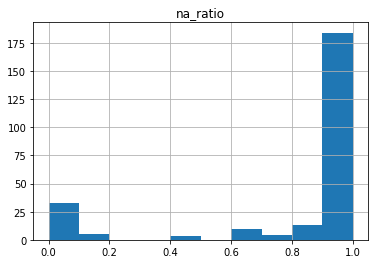

In [127]:
nas = df_train.isna().mean().sort_values(ascending = False).reset_index()
nas.rename(columns = {'index':'features',0:'na_ratio'},inplace = True)
nas.hist()
plt.show()

### Grant.status 비율

In [92]:
print(df_train['Grant.Status'].value_counts())
print(df_train['Grant.Status'].value_counts()/df_train['Grant.Status'].count())

0    4716
1    3992
Name: Grant.Status, dtype: int64
0    0.541571
1    0.458429
Name: Grant.Status, dtype: float64


### personal data

#### person column 확인

In [216]:
person_info = [col for col in df_train.columns if '15' in col]
person_info

['Person.ID.15',
 'Role.15',
 'Year.of.Birth.15',
 'Country.of.Birth.15',
 'Home.Language.15',
 'Dept.No..15',
 'Faculty.No..15',
 'With.PHD.15',
 'No..of.Years.in.Uni.at.Time.of.Grant.15',
 'Number.of.Successful.Grant.15',
 'Number.of.Unsuccessful.Grant.15',
 'A..15',
 'A.15',
 'B.15',
 'C.15']

#### 팀당 인원수 : n_people

In [133]:
col_person = [col for col in df_train.columns if 'Person' in col]
col_person

['Person.ID.1',
 'Person.ID.2',
 'Person.ID.3',
 'Person.ID.4',
 'Person.ID.5',
 'Person.ID.6',
 'Person.ID.7',
 'Person.ID.8',
 'Person.ID.9',
 'Person.ID.10',
 'Person.ID.11',
 'Person.ID.12',
 'Person.ID.13',
 'Person.ID.14',
 'Person.ID.15']

In [134]:
# column 별 person id 결측치가 아닌 데이터의 비율
# 1명 팀에도 결측치가 있다.
nas_person = df_train.loc[:,col_person].notna().mean()
nas_person

Person.ID.1     0.939940
Person.ID.2     0.343248
Person.ID.3     0.130225
Person.ID.4     0.048691
Person.ID.5     0.017915
Person.ID.6     0.008039
Person.ID.7     0.004134
Person.ID.8     0.001378
Person.ID.9     0.000919
Person.ID.10    0.000689
Person.ID.11    0.000574
Person.ID.12    0.000574
Person.ID.13    0.000345
Person.ID.14    0.000000
Person.ID.15    0.000230
dtype: float64

In [245]:
# row의 person id 가 na가 아닌 data의 수를 합해 팀별 인원수를 계산한다.
n_people = df_train.loc[:,col_person].notna().sum(axis = 1)
n_people = pd.Series(n_people)

#### 팀당 박사수 : n_phd

In [158]:
# With.PHD.n
col_phd = [col for col in df_train.columns if 'PHD' in col ]

# check PHD data type
# Yes or NA
df_train.loc[:,col_phd].apply(pd.value_counts)

,With.PHD.1,With.PHD.2,With.PHD.3,With.PHD.4,With.PHD.5,With.PHD.6,With.PHD.7,With.PHD.8,With.PHD.9,With.PHD.10,With.PHD.11,With.PHD.12,With.PHD.13,With.PHD.14,With.PHD.15
Yes,5113,1748,653,275,100,44,25,8,7,5,3,5,3,NaN,NaN


In [164]:
n_phd = df_train.loc[:,col_phd].notna().sum(axis = 1)
n_phd = pd.Series(n_phd)

#### 팀당 호주 출신 수  : n_hl_eng

In [172]:
col_country = [col for col in df_train.columns if 'Country' in col]
col_country

['Country.of.Birth.1',
 'Country.of.Birth.2',
 'Country.of.Birth.3',
 'Country.of.Birth.4',
 'Country.of.Birth.5',
 'Country.of.Birth.6',
 'Country.of.Birth.7',
 'Country.of.Birth.8',
 'Country.of.Birth.9',
 'Country.of.Birth.10',
 'Country.of.Birth.11',
 'Country.of.Birth.12',
 'Country.of.Birth.13',
 'Country.of.Birth.14',
 'Country.of.Birth.15']

In [173]:
# Home Laguage = English or Other
df_train.loc[:,col_country].apply(pd.value_counts)

,Country.of.Birth.1,Country.of.Birth.2,Country.of.Birth.3,Country.of.Birth.4,Country.of.Birth.5,Country.of.Birth.6,Country.of.Birth.7,Country.of.Birth.8,Country.of.Birth.9,Country.of.Birth.10,Country.of.Birth.11,Country.of.Birth.12,Country.of.Birth.13,Country.of.Birth.14,Country.of.Birth.15
Asia Pacific,330,113,65,23,10.0,6.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Australia,5445,1860,714,297,102.0,45.0,12.0,3.0,5.0,3.0,5.0,4.0,3.0,NaN,2.0
Eastern Europe,119,49,16,5,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Great Britain,661,231,77,22,13.0,3.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Middle East and Africa,77,10,9,2,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
New Zealand,79,39,9,3,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North America,265,64,12,4,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
South Africa,48,33,14,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Americas,72,15,1,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Western Europe,332,102,36,15,7.0,1.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN


In [178]:
# number of australian
n_birth_aus = (df_train.loc[:,col_country]== 'Australia').sum(axis =1)
n_birth_aus = pd.Series(n_birth_aus)

#### 팀당 지원금 수여 횟수, 실패 횟수, 총 지원 횟수, 성공 확률

In [179]:
col_grant_succ = [col for col in df_train.columns if 'Successful' in col] # 수여 성공
col_grant_fail = [col for col in df_train.columns if 'Unsuccessful' in col] # 수여 실패

In [194]:
n_apply_succ = df_train.loc[:,col_grant_succ].fillna(0).sum(axis = 1)
n_apply_fail = df_train.loc[:,col_grant_fail].fillna(0).sum(axis = 1)
n_apply_total = n_apply_succ+n_apply_fail
apply_succ_ratio = (n_apply_succ/n_apply_total).fillna(0)

#### 팀당 경력 총합 : sum_years

In [201]:
col_year = [col for col in df_train.columns if 'Years.in' in col]
# 0, 0-5, 5-10, 10,15, 15
df_train.loc[:,col_year].apply(pd.value_counts)

,No..of.Years.in.Uni.at.Time.of.Grant.1,No..of.Years.in.Uni.at.Time.of.Grant.2,No..of.Years.in.Uni.at.Time.of.Grant.3,No..of.Years.in.Uni.at.Time.of.Grant.4,No..of.Years.in.Uni.at.Time.of.Grant.5,No..of.Years.in.Uni.at.Time.of.Grant.6,No..of.Years.in.Uni.at.Time.of.Grant.7,No..of.Years.in.Uni.at.Time.of.Grant.8,No..of.Years.in.Uni.at.Time.of.Grant.9,No..of.Years.in.Uni.at.Time.of.Grant.10,No..of.Years.in.Uni.at.Time.of.Grant.11,No..of.Years.in.Uni.at.Time.of.Grant.12,No..of.Years.in.Uni.at.Time.of.Grant.13,No..of.Years.in.Uni.at.Time.of.Grant.14,No..of.Years.in.Uni.at.Time.of.Grant.15
>10 to 15,917,360,126,48,17,11,6,1,NaN,NaN,NaN,2.0,3.0,NaN,NaN
>5 to 10,1603,570,171,76,36,5,4,3,1.0,1.0,1.0,1.0,NaN,NaN,NaN
>=0 to 5,2830,881,312,91,33,18,16,4,4.0,2.0,NaN,NaN,NaN,NaN,NaN
Less than 0,1030,299,132,45,18,11,4,3,1.0,1.0,2.0,NaN,NaN,NaN,NaN
more than 15,847,394,198,106,32,11,2,1,2.0,2.0,2.0,2.0,NaN,NaN,2.0


In [215]:
# lable encoding {Less than 0 : 0 , >=0 to 5: 1 , >5 to 10 : 2, >10 to 15	 : 3 , more than 15 : 4}
dict_label = {'Less than 0' : 0 , '>=0 to 5' : 1 , '>5 to 10' : 2, '>10 to 15' : 3 , 'more than 15' : 4, 0:0}
tmp_labeled = df_train.loc[:,col_year].fillna(0).apply(lambda col : 
                                                       col.apply(lambda year : dict_label[year]))
sum_years = tmp_labeled.sum(axis = 1)

### team data

* Grant.Application.ID
* Grant.Status
* Sponsor.Code
* Grant.Category.Code
* Contract.Value.Band...see.note.A
* Start.dat

* RFCD.Code.1 - 5
* RFCD.Percentage.1 - 5

* SEO.Code.1 - 5
* SEO.Percentage.1 - 5

In [288]:
col_RFCD_code = [col for col in df_train.columns if 'RFCD.Code' in col]
col_RFCD_per = [col for col in df_train.columns if 'RFCD.Percentage' in col]
col_SEO_code = [col for col in df_train.columns if 'SEO.Code' in col]
col_SEO_per = [col for col in df_train.columns if 'SEO.Percentage' in col]

### RFCD

* 대분류(2자리) + 소분류(2자리)
* RFCD_1 만 사용

In [315]:
col_RFCD = df_train.loc[:,col_RFCD_code]

In [317]:
col_RFCD

,RFCD.Code.1,RFCD.Code.2,RFCD.Code.3,RFCD.Code.4,RFCD.Code.5
0,280199.0,0.0,0.0,0.0,0.0
1,280103.0,280106.0,280203.0,0.0,0.0
2,321004.0,321216.0,0.0,0.0,0.0
3,270602.0,320602.0,0.0,0.0,0.0
4,260500.0,280000.0,290000.0,0.0,0.0
5,321204.0,0.0,0.0,0.0,0.0
6,270708.0,270203.0,270401.0,0.0,0.0
7,321405.0,0.0,0.0,0.0,0.0
8,260108.0,260109.0,0.0,0.0,0.0
9,270708.0,270704.0,270203.0,0.0,0.0


In [316]:
# 800개 변수
col_RFCD = col_RFCD.fillna(0)
col_RFCD.apply(pd.value_counts)

,RFCD.Code.1,RFCD.Code.2,RFCD.Code.3,RFCD.Code.4,RFCD.Code.5
0.0,634.0,4623.0,6332.0,8537.0,8663.0
210000.0,17.0,NaN,NaN,NaN,NaN
230101.0,8.0,2.0,3.0,1.0,NaN
230102.0,NaN,NaN,2.0,NaN,NaN
230103.0,NaN,1.0,NaN,NaN,NaN
230105.0,11.0,3.0,NaN,NaN,NaN
230107.0,4.0,1.0,1.0,NaN,NaN
230111.0,3.0,6.0,2.0,NaN,NaN
230112.0,5.0,6.0,3.0,NaN,NaN
230113.0,2.0,NaN,1.0,NaN,NaN


In [349]:
# 대분류 + 소분류로 나눈다.
col_RFCD_1 = col_RFCD['RFCD.Code.1']

col_RFCD_1 = col_RFCD_1.apply(lambda code : str(int(code)).strip())
col_RFCD_1_main = col_RFCD_1.apply(lambda code : code[:2] if len(code) != 1 else '00')
col_RFCD_1_sub = col_RFCD_1.apply(lambda code : code[2:4] if len(code) != 1 else '00')

In [355]:
col_RFCD_1_main.nunique()

25

In [356]:
col_RFCD_1_sub.nunique()

19

In [361]:
col_SEO = df_train.loc[:,col_SEO_code].fillna(0)
col_SEO_1 = col_SEO['SEO.Code.1']

In [362]:
col_SEO_1 = col_SEO_1.apply(lambda code : str(int(code)).strip())
col_SEO_1_main = col_SEO_1.apply(lambda code : code[:2] if len(code) != 1 else '00')
col_SEO_1_sub = col_SEO_1.apply(lambda code : code[2:4] if len(code) != 1 else '00')

In [364]:
col_SEO_1_main.nunique()

20

In [365]:
col_SEO_1_sub.nunique()

18

### Modeling

#### data prepareation

In [402]:
# personal data
df_n_people = pd.DataFrame(n_people,columns = ['n_people'])
df_n_phd = pd.DataFrame(n_phd,columns = ['n_phd'])
df_n_birth_aus = pd.DataFrame(n_birth_aus,columns = ['n_aus'])
df_n_apply_succ = pd.DataFrame(n_apply_succ,columns = ['n_succ'])
df_n_apply_total = pd.DataFrame(n_apply_total,columns = ['n_apply_total'])
df_n_apply_ratio = pd.DataFrame(apply_succ_ratio,columns = ['n_apply_ratio'])

# Team Data
df_RFCD_main = pd.DataFrame(pd.Series(col_RFCD_1_main))
df_RFCD_sub = pd.DataFrame(pd.Series(col_RFCD_1_sub))
df_SEO_main = pd.DataFrame(pd.Series(col_SEO_1_main))
df_SEO_sub = `pd.DataFrame(pd.Series(col_SEO_1_sub))

df_RFCD_main.columns = ['RFCD_main']
df_RFCD_sub.columns = ['RFCD_sub']
df_SEO_main.columns = ['SEO_main']
df_SEO_sub.columns = ['SEO_sub']

In [404]:
tmp = df_train[['Grant.Application.ID','Grant.Status']]

In [411]:
tmp.head()

,Grant.Application.ID,Grant.Status,n_people,n_phd,n_aus,n_succ,n_apply_ratio,n_apply_total,RFCD_main_00,RFCD_main_21,RFCD_main_23,RFCD_main_24,RFCD_main_25,RFCD_main_26,RFCD_main_27,RFCD_main_28,RFCD_main_29,RFCD_main_30,RFCD_main_31,RFCD_main_32,RFCD_main_33,RFCD_main_34,RFCD_main_35,RFCD_main_36,RFCD_main_37,RFCD_main_38,RFCD_main_39,RFCD_main_40,RFCD_main_41,RFCD_main_42,RFCD_main_43,RFCD_main_44,RFCD_main_99,RFCD_sub_00_x,RFCD_sub_01_x,RFCD_sub_02_x,RFCD_sub_03_x,RFCD_sub_04_x,RFCD_sub_05_x,RFCD_sub_06_x,RFCD_sub_07_x,RFCD_sub_08_x,RFCD_sub_09_x,RFCD_sub_10_x,RFCD_sub_11_x,RFCD_sub_12_x,RFCD_sub_13_x,RFCD_sub_14_x,RFCD_sub_15,RFCD_sub_17_x,RFCD_sub_18,RFCD_sub_99_x,SEO_main_00,SEO_main_61,SEO_main_62,SEO_main_63,SEO_main_64,SEO_main_65,SEO_main_66,SEO_main_67,SEO_main_68,SEO_main_69,SEO_main_70,SEO_main_71,SEO_main_72,SEO_main_73,SEO_main_74,SEO_main_75,SEO_main_76,SEO_main_77,SEO_main_78,SEO_main_99,RFCD_sub_00_y,RFCD_sub_01_y,RFCD_sub_02_y,RFCD_sub_03_y,RFCD_sub_04_y,RFCD_sub_05_y,RFCD_sub_06_y,RFCD_sub_07_y,RFCD_sub_08_y,RFCD_sub_09_y,RFCD_sub_10_y,RFCD_sub_11_y,RFCD_sub_12_y,RFCD_sub_13_y,RFCD_sub_14_y,RFCD_sub_16,RFCD_sub_17_y,RFCD_sub_99_y
0,1,1,1,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,4,2,3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,2,2,2,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [406]:
# personal data
tmp = pd.merge(tmp, df_n_people, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = df_n_phd, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = df_n_birth_aus, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = df_n_apply_succ, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = df_n_apply_ratio, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = df_n_apply_total, how = 'outer', left_index=True, right_index=True)

In [410]:
# team data dummies
dum_1 = pd.get_dummies(df_RFCD_main, prefix='RFCD_main')
dum_2 = pd.get_dummies(df_RFCD_sub, prefix='RFCD_sub')
dum_3 = pd.get_dummies(df_SEO_main, prefix='SEO_main')
dum_4 = pd.get_dummies(df_SEO_sub, prefix='RFCD_sub')

tmp = pd.merge(left = tmp, right = dum_1, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = dum_2, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = dum_3, how = 'outer', left_index=True, right_index=True)
tmp = pd.merge(left = tmp, right = dum_4, how = 'outer', left_index=True, right_index=True)

In [412]:
x = tmp.drop(['Grant.Status'], axis = 1)
y = tmp['Grant.Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

### Logistice Regression

In [413]:
LR = LogisticRegression()
model = LR.fit(x_train,y_train)
y_pred = model.predict(x_test)

d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [414]:
print('modeling with personal data')
print('='*100)
print(clr(y_test,y_pred))

modeling with personal data
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1419
           1       0.73      0.63      0.67      1194

   micro avg       0.72      0.72      0.72      2613
   macro avg       0.72      0.71      0.72      2613
weighted avg       0.72      0.72      0.72      2613



modeling with personal+team dummies

---

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1419
           1       0.73      0.63      0.67      1194

modeling with personal data

---

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1419
           1       0.73      0.62      0.67      1194